# Logistic Regression 

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

plt.rcParams['font.size'] = 18
np.random.seed(42)

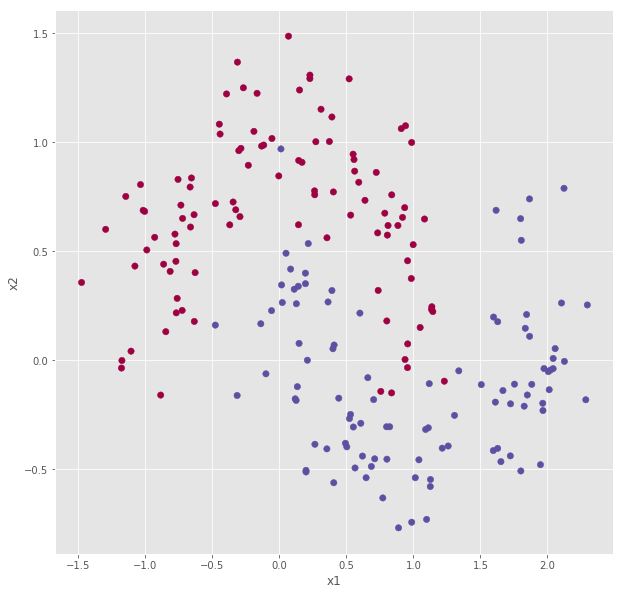

train_set_x shape: (2, 144)
train_set_y shape: (1, 144)
test_set_x shape: (2, 56)
test_set_y shape: (1, 56)


In [2]:
m = 200 # sample size
X, y = datasets.make_moons(m, noise=0.20)

mask = np.random.rand(m) < 0.7
X_training, y_training = X[mask].T, y[mask].reshape(-1, 1).T
X_test, y_test = X[~mask].T, y[~mask].reshape(-1, 1).T

with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=plt.cm.Spectral)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

print ("train_set_x shape: " + str(X_training.shape))
print ("train_set_y shape: " + str(y_training.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

In [3]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [4]:
print("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


**Expected Output**: 

<table>
  <tr>
    <td> sigmoid([0, 2]) </td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

In [5]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim, 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [6]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


**Expected Output**: 


<table style="width:15%">
    <tr>
        <td>  w </td>
        <td> [[ 0.][ 0.]] </td>
    </tr>
    <tr>
        <td> b </td>
        <td> 0 </td>
    </tr>
</table>

### Forward and Backward Propagation

- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Two formulas you need: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

In [7]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(w.T.dot(X) + b)                               # compute activation
    cost = - np.mean(Y * np.log(A) + (1 - Y) * np.log(1 - A)) # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRADIENTS)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1 / m) * X.dot((A - Y).T)
    db = np.mean(A - Y)
    ### END CODE HERE ###

    assert dw.shape == w.shape, dw[0].shape
    assert db.dtype == float
    cost = np.squeeze(cost)
    assert cost.shape == (), cost.shape
    
    grads = { "dw": dw, "db": db }
    
    return grads, cost

In [8]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  dw  </td>
      <td> [[ 0.99845601]
     [ 2.39507239]]</td>
    </tr>
    <tr>
        <td>  db  </td>
        <td> 0.00145557813678 </td>
    </tr>
    <tr>
        <td>  cost  </td>
        <td> 5.801545319394553 </td>
    </tr>

</table>

### Optimization

The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $w$, the update rule is $ w = w - \alpha \text{ } dw$, where $\alpha$ is the learning rate.

In [9]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w, "b": b}    
    grads = {"dw": dw, "db": db}
    
    return params, grads, costs

In [10]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067654


**Expected Output**: 

<table style="width:40%">
    <tr>
       <td> w </td>
       <td>[[ 0.19033591][ 0.12259159]] </td>
    </tr>
    <tr>
       <td> b </td>
       <td> 1.92535983008 </td>
    </tr>
    <tr>
       <td> dw </td>
       <td> [[ 0.67752042][ 1.41625495]] </td>
    </tr>
    <tr>
       <td> db </td>
       <td> 0.219194504541 </td>
    </tr>
</table>

In [11]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(w.T.dot(X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[:, i] = int(A[:, i] >= 0.5) 
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [12]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


**Expected Output**: 

<table style="width:30%">
    <tr>
         <td>predictions</td>
         <td>[[ 1.  1.  0.]]</td>  
   </tr>
</table>


In [13]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    return {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test, 
        "Y_prediction_train" : Y_prediction_train, 
        "w" : w, 
        "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations": num_iterations
    }

In [14]:
d = model(X_training, y_training, X_test, y_test, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.647396
Cost after iteration 200: 0.610066
Cost after iteration 300: 0.579221
Cost after iteration 400: 0.553420
Cost after iteration 500: 0.531592
Cost after iteration 600: 0.512934
Cost after iteration 700: 0.496837
Cost after iteration 800: 0.482833
Cost after iteration 900: 0.470557
Cost after iteration 1000: 0.459723
Cost after iteration 1100: 0.450102
Cost after iteration 1200: 0.441509
Cost after iteration 1300: 0.433794
Cost after iteration 1400: 0.426835
Cost after iteration 1500: 0.420528
Cost after iteration 1600: 0.414789
Cost after iteration 1700: 0.409548
Cost after iteration 1800: 0.404744
Cost after iteration 1900: 0.400325
train accuracy: 81.94444444444444 %
test accuracy: 80.35714285714286 %


**Expected Output**: 

<table style="width:40%"> 
    <tr>
        <td> Cost after iteration 0 </td> 
        <td> 0.693147 </td>
    </tr>
      <tr>
        <td> <center> $\vdots$ </center> </td> 
        <td> <center> $\vdots$ </center> </td> 
    </tr>  
    <tr>
        <td> Train Accuracy </td> 
        <td> 86.71328671328672 % </td>
    </tr>
    <tr>
        <td> Test Accuracy </td> 
        <td> 78.94736842105263 % </td>
    </tr>
</table> 




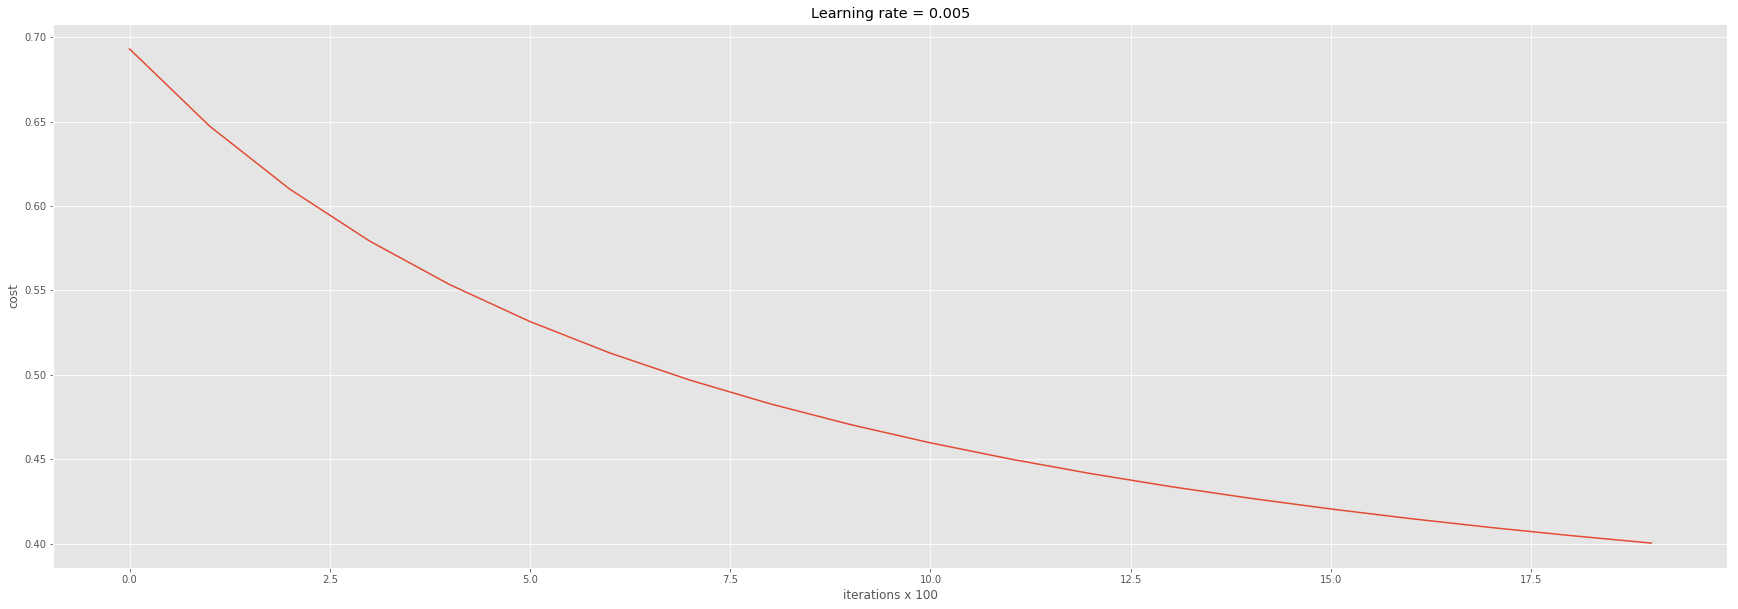

In [17]:
# Plot learning curve (with costs)

with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(30, 10))

    costs = np.squeeze(d['costs'])
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations x 100')
    plt.title("Learning rate = " + str(d["learning_rate"]))
    plt.show()

learning rate is: 0.01
train accuracy: 83.33333333333334 %
test accuracy: 82.14285714285714 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 78.47222222222223 %
test accuracy: 78.57142857142857 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 78.47222222222223 %
test accuracy: 78.57142857142857 %

-------------------------------------------------------



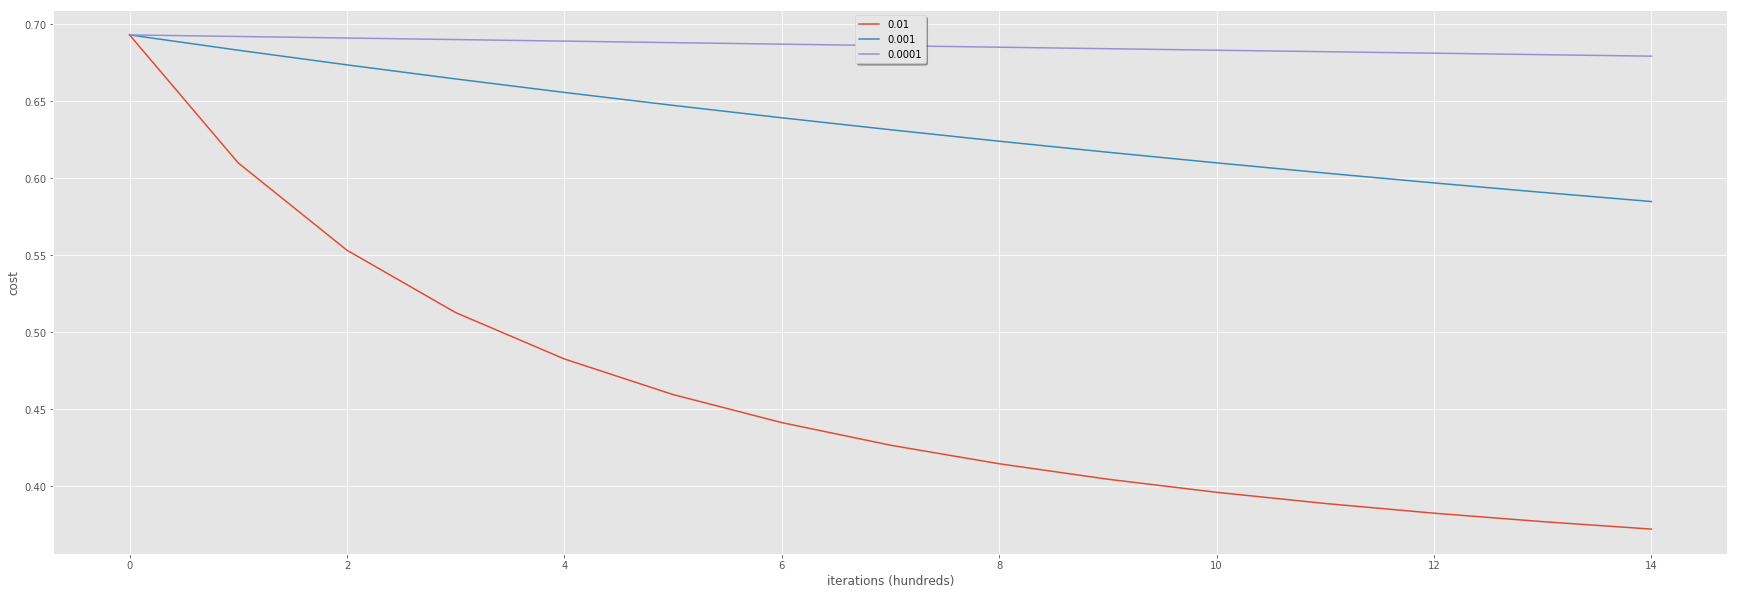

In [16]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(30, 10))
    
    for a in learning_rates:
        print ("learning rate is: " + str(a))
        models[str(a)] = model(X_training, y_training, X_test, y_test, num_iterations=1500, learning_rate=a, print_cost=False)
        print ('\n' + "-------------------------------------------------------" + '\n')

    for a in learning_rates:
        plt.plot(np.squeeze(models[str(a)]["costs"]), label= str(models[str(a)]["learning_rate"]))

    plt.ylabel('cost')
    plt.xlabel('iterations (hundreds)')

    legend = plt.legend(loc='upper center', shadow=True)
    frame = legend.get_frame()
    frame.set_facecolor('0.90')
    plt.show()

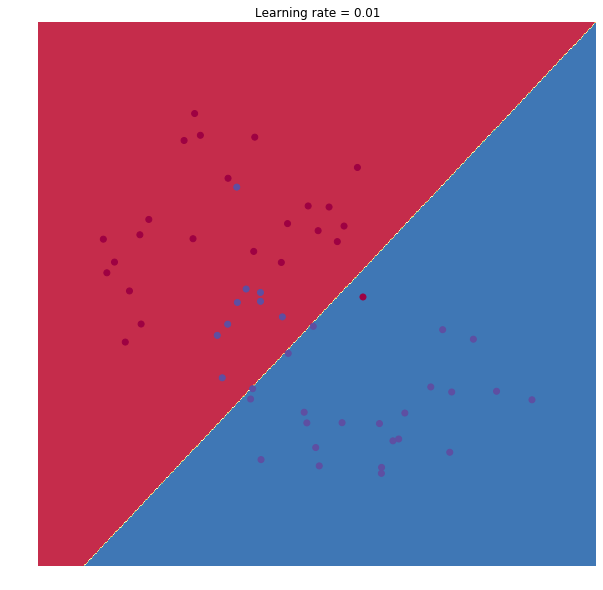

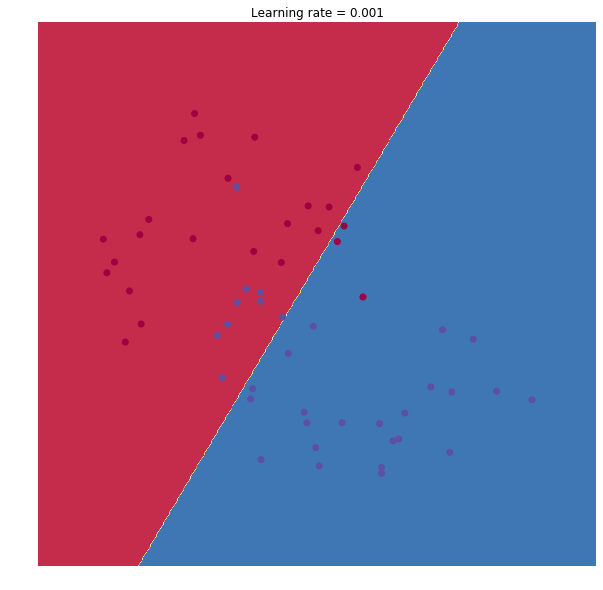

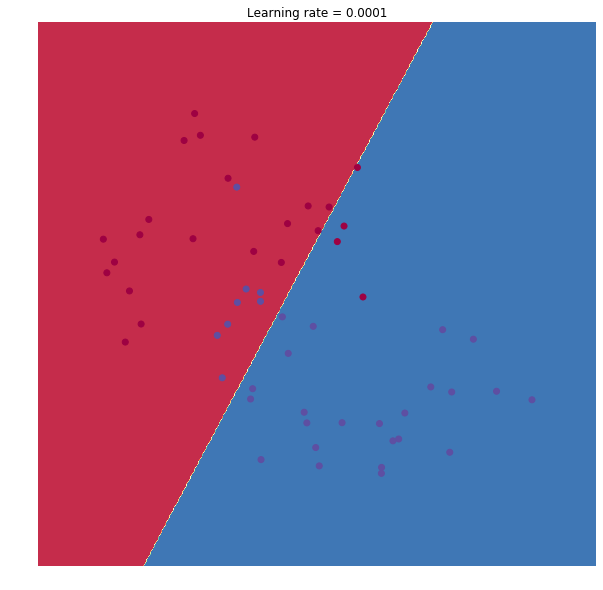

In [38]:
def plot_decision_boundary(title, figsize, func, X, y):
    # Set the boundaries, 0.5 is for padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Generate a meshgrid with h distance between points
    h = 0.01
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    # Predict output using the meshgrid as input
    Z = func(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=figsize)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
    
for a in learning_rates:
    a = str(a)
    func = lambda x: predict(models[a]['w'], models[a]['b'], x.T).T.reshape((-1,))
    plot_decision_boundary('Learning rate = ' + str(a), (10, 10), func, X_test.T, y_test.T.reshape((-1,)))